## 作業
### 完成一個學生的類別 name score
## 我希望有一個List 可存放學生的物件 並可根據score排序

In [2]:
class Student:
    def __init__(self,name,score):
        self.name = name
        self.score = score
    def __str__(self):      
        return f"{self.name} {self.score}"
    def __lt__(self,other):    
        return self.score < other.score
st1 = Student("Ken",75)        
st2 = Student("Vivin",88)        
st3 = Student("Lucy",65)        
st4 = Student("Joy",91)  
st5 = Student("Iris",77) 
myList = [st1,st2,st3,st4,st5]
myList.sort()
for s in myList:
    print(s)

Lucy 65
Ken 75
Iris 77
Vivin 88
Joy 91


In [5]:
import os
print(os.getcwd())

C:\Users\xvpow\ai_python20250710\ch11


## CSV
+ CSV 格式是資料庫最常用的導入和導出格式。
+ 資料均沒有類型，一切都是字串。
+ 沒有字體或顏色與儲存格寬度高度的設置。
+ Python 語法必須加入 import csv。
+ 讀取儲存格資料：
  + reader( )：依照每一列的編號 由0開始
  + DictReader( )
    + 以第一列的值為每一行的名稱，第一列不是資料
    + 也可以重新命名，但第一列必須是資料

In [6]:
import csv
f = open("example1.csv","r")
for row in csv.reader(f):
    print(row[0],row[1])

 104/01/02 2,104,640,545
 104/01/03 2,640,781,030
 104/01/04 2,983,756,821
 104/01/05 3,062,757,248
 104/01/06 3,314,147,435
 104/01/09 2,610,433,477
 104/01/10 3,595,611,551
 104/01/11 3,322,390,467
 104/01/12 2,969,248,375
 104/01/13 3,497,838,901
 104/01/16 3,184,795,667
 104/01/17 3,720,277,205
 104/01/18 4,088,756,925
 104/01/30 4,540,373,544
 104/01/31 5,486,734,180


In [11]:
import csv
f = open("example.csv","r",encoding="utf-8")
for row in csv.DictReader(f):
    print(row["日期"],row["成交金額"])

 104/01/02 50,472,201,894
 104/01/03 64,138,886,194
 104/01/04 75,845,629,353
 104/01/05 76,850,752,698
 104/01/06 88,101,921,548
 104/01/09 71,323,370,369
 104/01/10 97,168,542,017
 104/01/11 88,786,671,892
 104/01/12 78,947,910,460
 104/01/13 99,286,437,370
 104/01/16 76,842,611,338
 104/01/17 101,133,309,290
 104/01/18 113,988,641,382
 104/01/30 143,900,658,474
 104/01/31 162,361,181,834


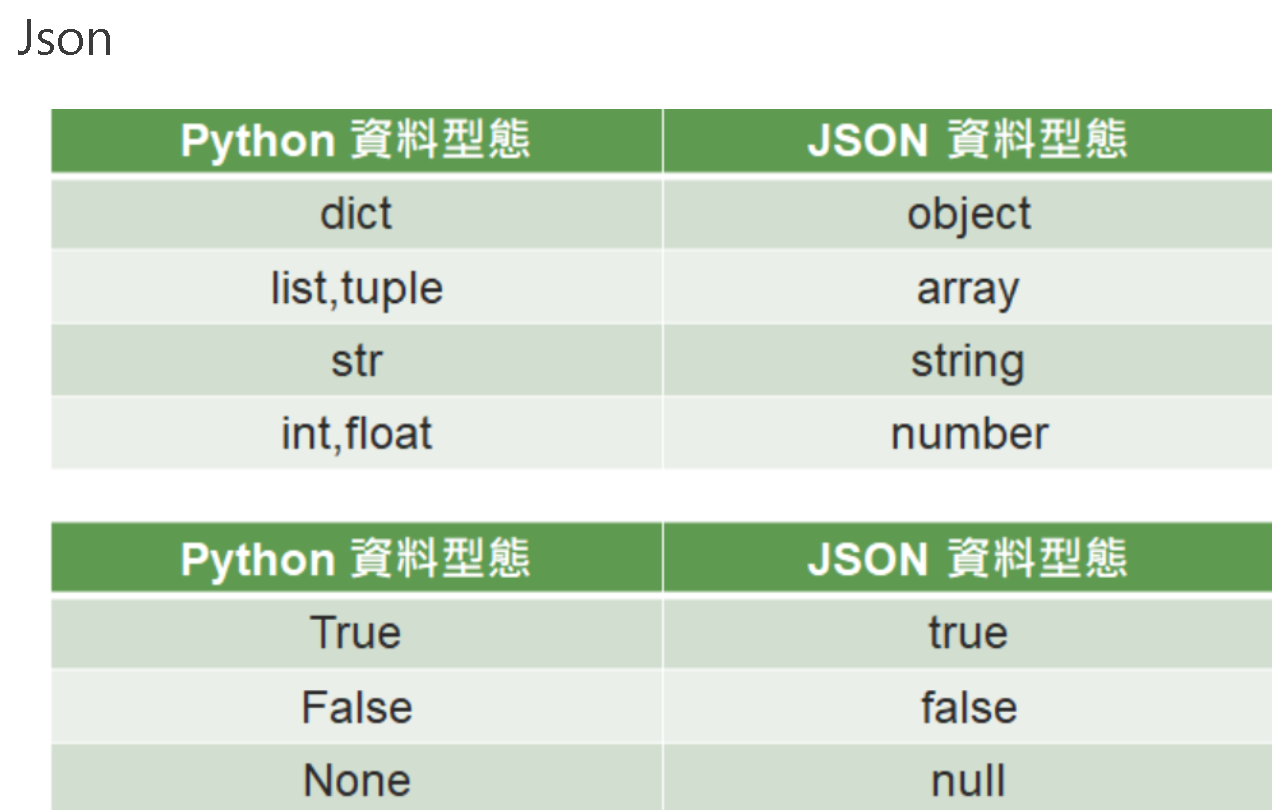

## Json
+ 以 json.dumps( ) 函數從 Python 物件轉入 轉出JSON格式字串。
+ 以 json.dump( )函數從 Python 物件轉入 轉出JSON 檔案中。
+ json資料於Python處理UTF8碼內容會產生亂碼，建議 dumps 時加入以下的參數才可以正確處理UTF8碼內容

In [17]:
import json
json1 = {'python':"課程","gjun":100,"python-class":True,"Line":None}
print(json1)
print(type(json1))
jsonStr = json.dumps(json1,ensure_ascii=False)
print(jsonStr)

{'python': '課程', 'gjun': 100, 'python-class': True, 'Line': None}
<class 'dict'>
{"python": "課程", "gjun": 100, "python-class": true, "Line": null}


In [18]:
import json
json1 = {'python':"課程","gjun":100,"python-class":True,"Line":None}
with open("data0.json","w",encoding="utf-8") as outfile:
    json.dump(json1,outfile,ensure_ascii=False)

In [21]:
import json
data = { }
data['people'] = [ ]
data['people'].append({
    'name': 'Scott',
    'website': 'stackabuse.com',
    'from': 'Nebraska'
})
data['people'].append({
    'name': 'Larry',
    'website': 'google.com',
    'from': 'Michigan'
})

with open("data.json","w",encoding="utf-8") as outfile:
    json.dump(data,outfile,ensure_ascii=False,indent=2)

### Json 轉為 Python物件
+ 以 json.loads( ) 函數從 JSON 字串中取出資料轉入 Python。
+ 以 json.load( ) 函數從 JSON 檔案中取出資料轉入 Python。

In [23]:
import json
json1 = '{"python":"good","gjun":100,"python-class":true,"ICQ":null}'
json2 = json.loads(json1)
print(json2)
print(type(json2))
print(json2["gjun"])

{'python': 'good', 'gjun': 100, 'python-class': True, 'ICQ': None}
<class 'dict'>
100


In [27]:
import json
with open("data.json","r",encoding="utf-8") as jsonFile:
    data = json.load(jsonFile)
    print(data)
    for k in data:
        print(f"{k}-{data[k]}")

{'people': [{'name': 'Scott', 'website': 'stackabuse.com', 'from': 'Nebraska'}, {'name': 'Larry', 'website': 'google.com', 'from': 'Michigan'}]}
people-[{'name': 'Scott', 'website': 'stackabuse.com', 'from': 'Nebraska'}, {'name': 'Larry', 'website': 'google.com', 'from': 'Michigan'}]


## 關於檔案關閉動作
+ 檔案開啟後須進行 close( ) 方法進行關閉動作。
+ 若檔案沒關閉會造成：
  + 開啟的文件物件會占用系統資源。
  + Python 可以同時間開啟的文件數量有限制 (約 20 份文件)。
  + 開啟文件物件的模式若為寫入 (w 或 a) 模式，一般都是暫存於緩衝區，系統閒置或文件關閉前才會進行寫入，若沒有進行 close( ) 動作可能造成文件儲存不完整。

In [13]:
import os
class TestFile:
     def openFile(self,filePath):   
            self.handle = open(filePath,"w")
            #self.handle.close()
t = TestFile()
t.openFile("text.txt")
os.remove("text.txt")
print("Success")

PermissionError: [WinError 32] 程序無法存取檔案，因為檔案正由另一個程序使用。: 'text.txt'

In [12]:
import os
class TestFile:
     def openFile(self,filePath):   
            with  open(filePath,"w") as f:
                 f.write("Hello!")
          
t = TestFile()
t.openFile("text.txt")
os.remove("text.txt")
print("Success")

Success


## 爬蟲

pip install beautifulsoup4

pip install html5lib

In [2]:
from bs4 import BeautifulSoup

## BeautifulSoup Base
find() 只找第一個符合條件的

https://www.crummy.com/software/BeautifulSoup/bs4/doc.zh/#find-all

find_all() 找所有符合條件的

select_one() 只找一個符合條件的可直接使用css語法

select() 找所有符合條件的可使用css語法


In [1]:
from bs4 import BeautifulSoup
html='''<a id='a1' class="c1">V1</a>
<a id='a2' class="c1">V2</a>
<a id='a3' class="c3">V3</a>
'''
soup = BeautifulSoup(html,"html5lib")
print(soup.find(id="a1"))
print(soup.find_all(class_ = "c1"))

<a class="c1" id="a1">V1</a>
[<a class="c1" id="a1">V1</a>, <a class="c1" id="a2">V2</a>]
